<a href="https://colab.research.google.com/github/Jgabriel1800/estat-stica-varejo/blob/main/estatistica_frequencia_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt

In [10]:
dados=pd.read_csv('/content/vendas_ecommerce.csv')

In [11]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Não achamos valores nulos

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Analisando quais categorias de produto tem mais vendas

In [22]:
produtos=dados['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


<ipython-input-27-6a1fef66b35c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


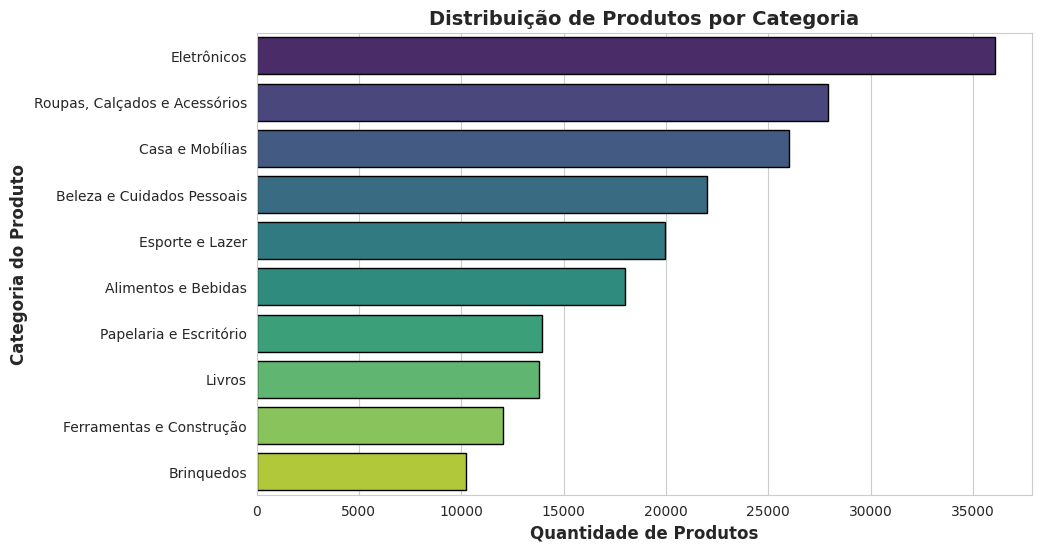

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='count',
    y='categoria_produto',
    data=produtos,
    palette='viridis',
    edgecolor='black'
)
ax.set_xlabel("Quantidade de Produtos", fontsize=12, fontweight='bold')
ax.set_ylabel("Categoria do Produto", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Produtos por Categoria", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**A categoria que mais possui vendas é a de eletrônicos, seguida por roupas,calçados e acessórios e logo após casa e mobílias**

In [29]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [31]:
sorted(dados['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Criando as categorias

In [48]:
dados['avaliacao indicador']=pd.Categorical(
    dados['avaliacao'], categories=[1,2,3,4,5], ordered=True

)

referenciando os valores as palavras

In [49]:
avaliacao_labels={1:'Péssimo',2:'Ruim',3:'Regular',4:'Bom',5:'Ótimo'}

dados['avaliacao indicador']=dados['avaliacao indicador'].map(avaliacao_labels)

In [50]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao_indicador,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo,Ótimo


In [51]:
df_unico=dados[['avaliacao','avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


Analisando a quantidade de produtos vendidos

In [39]:
print("Vendemos de ",dados['quantidade'].min()," a ",dados['quantidade'].max()," unidades de produtos")

Vendemos de  1  a  10  unidades de produtos


In [43]:
print("Temos produtos com valores a partir de ",dados['total_compra'].min(),'reais até o valor de ',dados['total_compra'].max(),'reais')


Temos produtos com valores a partir de  5.05 reais até o valor de  20744.7 reais


Analisando quais foram as 10 compras mais caras na loja

In [45]:
dados.sort_values('total_compra',ascending=False).head(10)

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao_indicador
108742,8c971cc6-964e-468d-86f8-1e6955887bd1,Feminino,28,Sudeste,Eletrônicos,2074.47,10,20744.7,11,1,Péssimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.7,6,5,Ótimo
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.8,4,5,Ótimo
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.6,6,2,Ruim
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.4,7,2,Ruim
157284,c54c472b-03fc-44bc-baf4-5cab1058da40,Feminino,31,Sudeste,Eletrônicos,2032.69,10,20326.9,8,5,Ótimo
154275,4de22f75-824b-49a2-a758-c9e98d072c1e,Masculino,53,Nordeste,Eletrônicos,2021.43,10,20214.3,9,1,Péssimo
25798,cbefed8b-db8a-4c26-b7fa-0133cc82dd8d,Masculino,50,Nordeste,Eletrônicos,2012.22,10,20122.2,5,5,Ótimo
124404,ddda23ab-27d2-440d-829a-824127250ea2,Feminino,24,Sudeste,Eletrônicos,2011.10,10,20111.0,12,1,Péssimo
24720,54a9c744-4dfe-4943-9166-2448c619e787,Masculino,33,Nordeste,Eletrônicos,2007.45,10,20074.5,7,5,Ótimo


**Identificando o perfil do público da loja**

Acompanhando as avaliações dos clientes

In [56]:
frequencia_avaliacoes = (
    dados.groupby('avaliacao indicador', observed=False)
    .size()
    .reset_index(name='frequencia_absoluta')
    .sort_values(by='avaliacao indicador', ascending=False)
)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


In [58]:
frequencia_avaliacoes['frequencia relativa']=round((frequencia_avaliacoes['frequencia_absoluta']/
                                                   frequencia_avaliacoes['frequencia_absoluta'].sum())*100,1)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta,frequencia relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [59]:
frequencia_avaliacoes.columns=['Avaliação','Quantidade','Porcentagem(%)']

Criando o gráfico

<ipython-input-64-db409ccfb361>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


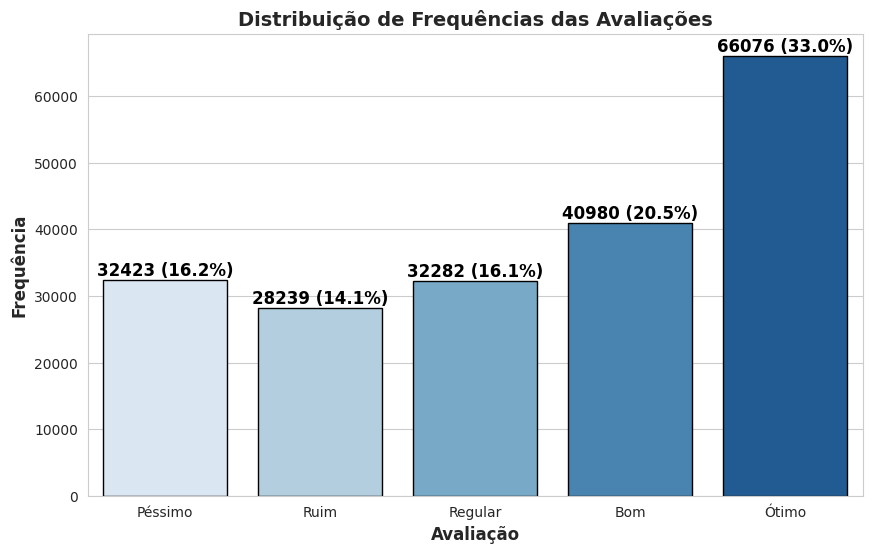

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=frequencia_avaliacoes,
    x='Avaliação',
    y='Quantidade',
    palette='Blues',
    edgecolor='black'
)

for index, row in frequencia_avaliacoes.iterrows():
    ax.text(
        index,
        row['Quantidade'] + 0.5,
        f"{row['Quantidade']} ({row['Porcentagem(%)']:.1f}%)",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

ax.set_xlabel("Avaliação", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequência", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Frequências das Avaliações", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)

plt.yticks(fontsize=10)
plt.show()

**Notamos que a categoria péssimo ficou acima das categorias 'Ruim' e 'Regular' por 2,1% e 0,1% respectivamente**

Analisando as avaliações dos clientes de cada regiao do Brasil

In [66]:
tab_avaliacao_reg=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'])
tab_avaliacao_reg

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


In [68]:
tab_avaliacoes_reg_rel=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'],normalize='columns')*100
tab_avaliacoes_reg_rel=round(tab_avaliacoes_reg_rel,1)


tab_avaliacoes_reg_rel

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


Vamos analisar quais regiões tem mais avaliações positivas

In [71]:
tab_avaliacoes_filtro=tab_avaliacoes_reg_rel.loc[['Ótimo','Bom']]
resultado=tab_avaliacoes_filtro.sum().sort_values(ascending=False)
resultado

,0
regiao_cliente,
Nordeste,58.9
Centro-Oeste,58.6
Sudeste,50.3
Sul,50.1
Norte,48.4


**As regiões Centro-Oeste e Nordeste tem as duas melhores avaliações com 58.6% e 58.9% respectivamente**

In [72]:
tab_avaliacoes_filtro_negativa=tab_avaliacoes_reg_rel.loc[['Ruim','Péssimo']]
resultado_negativa=tab_avaliacoes_filtro_negativa.sum().sort_values(ascending=False)
resultado_negativa

,0
regiao_cliente,
Sul,34.3
Centro-Oeste,30.1
Norte,30.0
Nordeste,29.6
Sudeste,28.8


**As regiões Sul e Centro-Oeste tem as piores avaliações com 34.3% e 30.1% respectivamente**

Vamos entender como o ticket médio varia entre o gênero e a sua região de residência

In [74]:
ticket_medio=round(pd.crosstab(dados['sexo_biologico'],dados['regiao_cliente'],values=dados['total_compra'],aggfunc='mean'),2)
ticket_medio

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1887.12,1861.09,1828.61,2160.82,2176.44
Masculino,2025.24,2005.31,1830.54,1881.08,1871.38


Observa-se que as pessoas do gênero masculino nas regiões Centro-Oeste e Nordeste, com uma diferença de aproximadamente **150,00** reais.  
Porém, as pessoas do gênero feminino gastam mais do que as pessoas do gênero masculino na região Sul e Sudeste, com uma diferença de aproximadamente **300,00** reais.
